<a href="https://colab.research.google.com/github/AlexxLai/ml0716/blob/master/cnn_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test)= load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:

trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

airplane


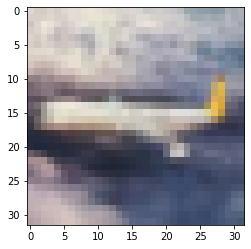

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, 49999)
print(trans[y_train[i][0]])
plt.imshow(x_train[i])

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
layers = [
    # 3 * 3 * 3(一個過濾器) * 64(個) + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個過濾器) * 128(個) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),    
    Conv2D(256, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

In [6]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [7]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)       
]
model.fit(x_train_norm, 
     y_train, 
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

In [ ]:
model.evaluate(x_test_norm, y_test)